In [1]:
import random
import sklearn
import sklearn.datasets 
import sklearn.svm as svm
import numpy as np
from matplotlib import pyplot as plt

# Tell matplotlib to show the plots within the notebook.
%matplotlib inline

np.random.seed(42)

In [2]:
digits = sklearn.datasets.load_digits()

Visualize some images! 

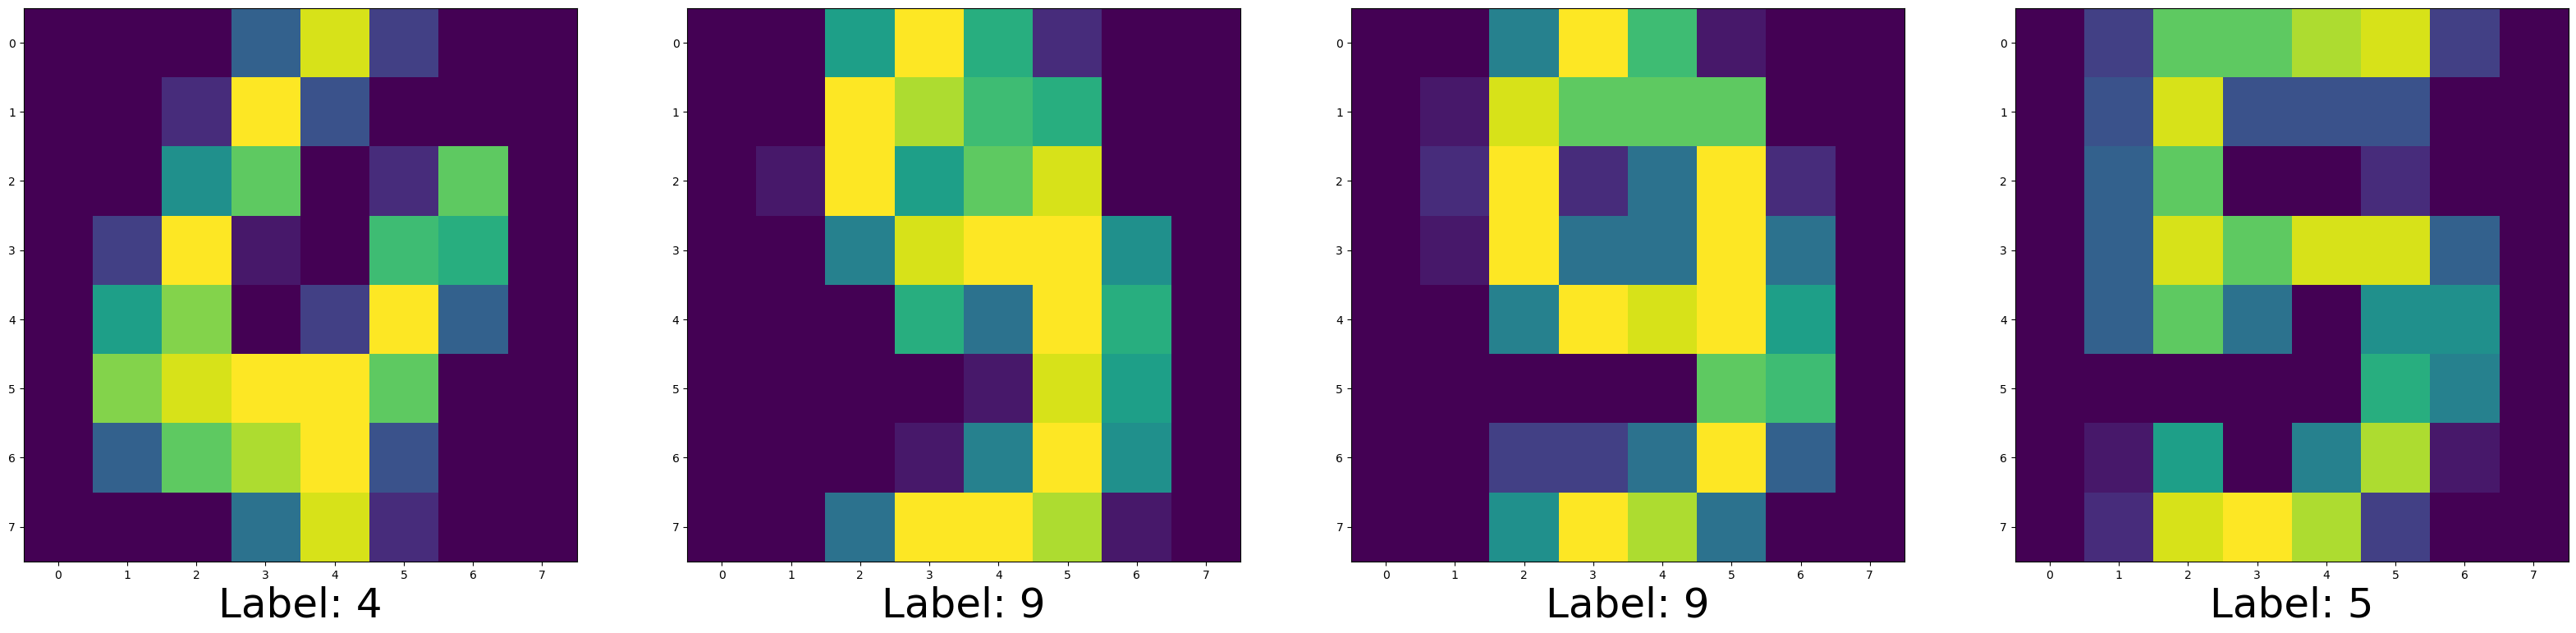

In [3]:
n = 4
random_indices = [random.randint(0, len(digits.images)) for i in range(n)]

fig, axes = plt.subplots(1, n, figsize=(40*1, 40*n))

for _col, sample_idx in enumerate(random_indices):
    img, lbl = digits.images[sample_idx], digits.target[sample_idx]
    axes[_col].imshow(img)
    axes[_col].set_xlabel(f"Label: {lbl}", fontsize=36) 

plt.show()

In [4]:

def train_test_split(data, target, fraction):
    """
    Split the data into two parts. 
    The length of the 1st part is fraction * total length of the dataset.
    """

    assert len(data) == len(target), "The length of data and target must be the same."
    
    length_1 = int(len(data) * fraction)
    
    indices = np.random.permutation(len(data))
    indices_1 = indices[:length_1]
    indices_2 = indices[length_1:]

    train_1, target_1 = data[indices_1], target[indices_1]
    train_2, target_2 = data[indices_2], target[indices_2]

    return train_1, target_1, train_2, target_2

In [5]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [6]:
# Split data into 50% train and 50% test subsets
X_trainval, y_trainval, X_test, y_test = \
    train_test_split( 
        data,
        digits.target,
        0.5
    )

# Now Split the TRAIN data into 80% train and 20% cross-validation subsets
X_train, y_train, X_val, y_val = \
    train_test_split( 
        X_trainval,
        y_trainval,
        0.8
    )

In [7]:
print(f"{X_train.shape=} {y_train.shape=}")
print(f"{X_val.shape=} {y_val.shape=}")
print(f"{X_test.shape=} {y_test.shape=}")

X_train.shape=(718, 64) y_train.shape=(718,)
X_val.shape=(180, 64) y_val.shape=(180,)
X_test.shape=(899, 64) y_test.shape=(899,)


In [8]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.0001)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the val subset
output = clf.decision_function(X_val)

print(f"Model output has shape {output.shape}")


########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = output.argmax(axis=1)
########################################

print(f"Prediction has shape {preds.shape}")

Model output has shape (180, 10)
Prediction has shape (180,)


In [9]:
def accuracy_top1(predictions, targets):
    ########  TODO ########################
    # Return the mean accuracy (range from [0, 100])
    assert len(predictions) == len(targets)
    accuracy = np.sum(predictions == targets) / len(predictions)
    return accuracy # replace with accuracy
    ########################################

In [10]:
print(f"Cross-validation accuracy is {accuracy_top1(preds, y_val):0.3f}")

Cross-validation accuracy is 0.956


Go back to the previous cell and try different gamma values [0.1 0.01 0.001 0.0001 0.00001] for the classifier configuration and report results for each over the `val` set.


Please write down your tested values and results here. Which gamma value worked best on the val set?


In [11]:
# Now insert your best gamma value and train the model again.
best_gamma_value = 0.0001 # Replace this with your best finding!

clf = svm.SVC(gamma=best_gamma_value)
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
output = clf.decision_function(X_test)

########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = output.argmax(axis=1)
########################################

In [12]:
print(f"Final test accuracy is {accuracy_top1(preds, y_test):0.3f}")

Final test accuracy is 0.957


In [13]:
def softmax(x):
    """
    Args       x: Numpy array of shape (N, num_classes) with real values
    Returns    Numpy array of shape (N, num_classes) with softmax probability scores
    """
    ########  TODO ########################
    # return per-sample softmax scores
    return np.exp(x) / np.sum(np.exp(x))
    ########################################

########  TODO ########################
# Using the softmax function defined above, convert (N, 10) outputs 
# to (N,) Softmax probabilities for the predicted class
scores = [softmax(output[i]) for i in range(len(output))]
########################################

Visualize some of the test predictions!

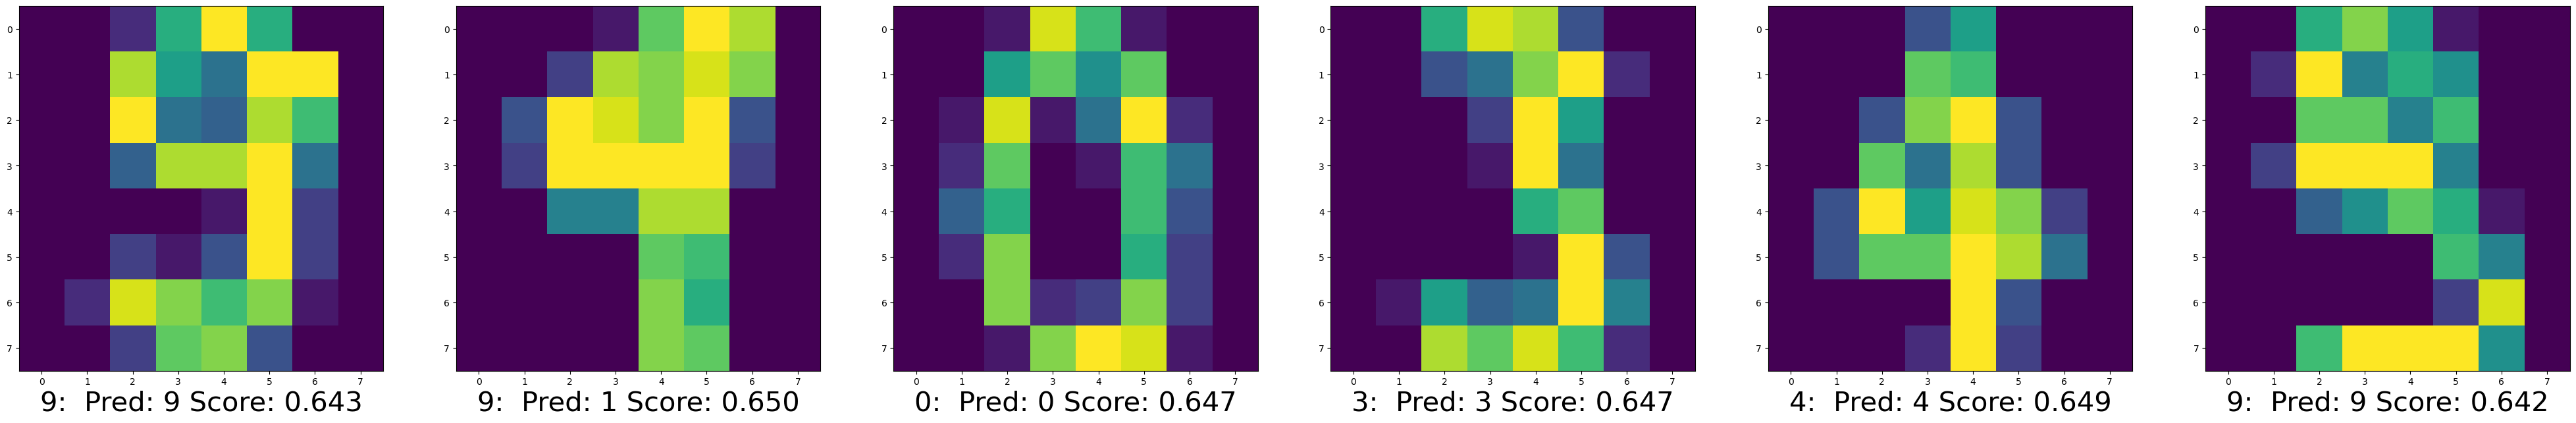

In [23]:
n = 6
random_indices = [random.randint(0, len(X_test)) for i in range(n)]
fig, axes = plt.subplots(1, n, figsize=(50*1, 50*n))


for _col, sample_idx in enumerate(random_indices):
    img = X_test[sample_idx].reshape((8, 8))
    lbl = y_test[sample_idx]

    axes[_col].imshow(img)
    axes[_col].set_xlabel(
        f"{lbl}:  Pred: {preds[sample_idx]} Score: {np.max(scores[sample_idx]):0.3f}",
        fontsize=30
    )


plt.show()